In [1]:
using IonSim
using QuantumOptics

In [2]:
# # Construct the system
# C = Ca40([("S1/2", -1/2), ("D5/2", -1/2)])
# set_sublevel_alias!(C, Dict("S" => ("S1/2", -1/2),
#                             "D" => ("D5/2", -1/2)))
# L = Laser()
# chain = LinearChain(
#         ions=[C], com_frequencies=(x=3e6, y=3e6, z=1e6),
#         vibrational_modes=(;z=[1])
#     )
# T = Trap(configuration=chain, B=4e-4, Bhat=ẑ, lasers=[L])

# # Set the laser parameters
# L.k = (x̂ + ẑ)/√2
# L.ϵ = (x̂ - ẑ)/√2
# L.λ = transitionwavelength(C, ("S", "D"), T)
# Efield_from_pi_time!(2e-6, T, 1, 1, ("S", "D"))

# # Set the vibrational mode Hilbert space dimension
# mode = T.configuration.vibrational_modes.z[1]
# mode.N = 100

# # Construct initial state
# ρi_ion = dm(C["S"])
# ρi_mode = thermalstate(mode, 10)  # thermal state n̄=10
# ρi = ρi_ion ⊗ ρi_mode

# # Construct the hamiltonian
# h = hamiltonian(T, timescale=1e-6)

# # Solve the system
# tout, sol = timeevolution.schroedinger_dynamic(0:.1:50, ρi, h);

In [3]:
# Construct the system
C = Ca40([("S1/2", -1/2, "S"), ("D5/2", -1/2, "D")])
L = Laser()
chain = LinearChain(
        ions=[C], comfrequencies=(x=3e6, y=3e6, z=1e6),
        selectedmodes=(;z=[1])
    )
chamber = Chamber(B=4e-4, Bhat=ẑ, iontrap=chain, lasers=[L])

Chamber

In [4]:
# Set the laser parameters
L.k = (x̂ + ẑ)/√2 
L.ϵ = (x̂ - ẑ)/√2
wavelength_from_transition!(L, C, ("S", "D"), chamber)
E = intensity_from_pitime!(1, 2e-6, 1, ("S", "D"), chamber)

# Set the vibrational mode Hilbert space dimension
modes(chamber)[1].N = 10 # should be 100

10

In [7]:
# Construct initial state
ρi_ion = dm(C["S"])
ρi_mode = thermalstate(modes(chamber)[1], 10)  # thermal state n̄=10
ρi = ρi_ion ⊗ ρi_mode

Operator(dim=22x22)
  basis: [⁴⁰Ca
 ⊗ VibrationalMode(ν=1.0e6, axis=ẑ, N=10)]
 0.139966+0.0im  0.0+0.0im       0.0+0.0im  …        0.0+0.0im  0.0+0.0im
      0.0+0.0im  0.0+0.0im       0.0+0.0im           0.0+0.0im  0.0+0.0im
      0.0+0.0im  0.0+0.0im  0.127242+0.0im           0.0+0.0im  0.0+0.0im
      0.0+0.0im  0.0+0.0im       0.0+0.0im           0.0+0.0im  0.0+0.0im
      0.0+0.0im  0.0+0.0im       0.0+0.0im           0.0+0.0im  0.0+0.0im
      0.0+0.0im  0.0+0.0im       0.0+0.0im  …        0.0+0.0im  0.0+0.0im
      0.0+0.0im  0.0+0.0im       0.0+0.0im           0.0+0.0im  0.0+0.0im
      0.0+0.0im  0.0+0.0im       0.0+0.0im           0.0+0.0im  0.0+0.0im
      0.0+0.0im  0.0+0.0im       0.0+0.0im           0.0+0.0im  0.0+0.0im
      0.0+0.0im  0.0+0.0im       0.0+0.0im           0.0+0.0im  0.0+0.0im
      0.0+0.0im  0.0+0.0im       0.0+0.0im  …        0.0+0.0im  0.0+0.0im
      0.0+0.0im  0.0+0.0im       0.0+0.0im           0.0+0.0im  0.0+0.0im
      0.0+0.0im  0.0+0.0im       0

In [8]:
# Construct the hamiltonian
h = hamiltonian(chamber, timescale=1e-6)

# Solve the system
tspan = 0:.1:50
tout, sol = timeevolution.schroedinger_dynamic(tspan, ρi, h);

In [12]:
# ENV["MPLBACKEND"]="tkagg"
import PyPlot

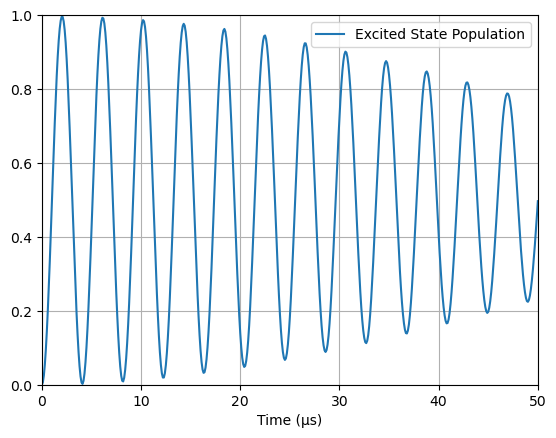

PyObject <matplotlib.legend.Legend object at 0x16a2622f0>

In [13]:
const plt = PyPlot

plt.plot(
        tout, expect(ionprojector(chamber, "D"), sol),
        label="Excited State Population"
    )
plt.xlim(tout[1], tout[end])
plt.ylim(0, 1)
plt.grid()
plt.xlabel("Time (μs)")
plt.legend(loc=1)
# gcf()